In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split        # yellow color means can use directly
from sklearn.linear_model import LinearRegression           # blue color means can't use directly, similar to class
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [151]:
df = pd.read_csv('Ice_cream selling data.csv')
df
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

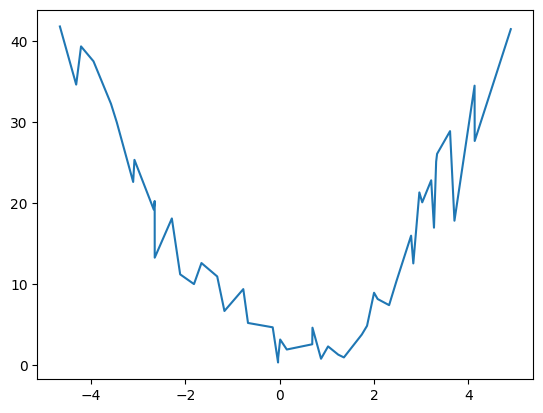

In [152]:
plt.plot(df['Temperature (°C)'],df['Ice Cream Sales (units)'])

In [153]:
x=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']


In [154]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, random_state= 42)

In [155]:
train_test_split(x,y,test_size=0.2, random_state= 42)

[    Temperature (°C)
 12         -2.111870
 4          -3.578554
 34          2.318591
 8          -2.672461
 3          -3.949661
 6          -3.108440
 40          3.211366
 41          3.270044
 46          4.130868
 15         -1.326379
 9          -2.652287
 16         -1.173123
 24          0.688781
 33          2.075101
 30          1.740000
 0          -4.662263
 43          3.335932
 32          1.999310
 5          -3.455712
 29          1.359813
 11         -2.288264
 36          2.784836
 1          -4.316559
 21         -0.033895
 2          -4.213985
 37          2.831760
 35          2.471946
 23          0.149245
 39          3.020874
 10         -2.651498
 22          0.008608
 18         -0.673753
 48          4.899032
 20         -0.036156
 7          -3.081303
 42          3.316073
 14         -1.660348
 28          1.240712
 38          2.959932,
     Temperature (°C)
 13         -1.818938
 45          3.704057
 47          4.133534
 44          3.610778
 17      

# Linear Regression

In [156]:
model = LinearRegression()  

In [157]:
# fit or train the model
model.fit(xtrain,ytrain)      

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [158]:
if model.intercept_ < 0:
    model.intercept_ = 0

model.intercept_

# if its minus values we can add condition saying put 0 if minus values

np.float64(17.139213127718417)

In [159]:
model.coef_

array([-1.14658686])

In [160]:
ypred = model.predict(xtest) 
ypred

array([19.2247831 , 12.89218952, 12.39975758, 12.99914196, 18.0259032 ,
       15.96490086, 16.13605851, 16.34394177, 15.0173946 , 17.3107825 ])

In [161]:
ytest-ypred

13    -9.211915
45     4.951767
47    15.298626
44    15.913046
17    -8.632935
27   -13.651095
26   -15.346085
25   -11.718252
31   -10.159407
19   -12.637140
Name: Ice Cream Sales (units), dtype: float64

In [162]:
r2_score(ytest,ypred)

-0.5751270190188227

In [163]:
model.score(xtest,ytest)

-0.5751270190188227

In [164]:
mean_squared_error(ytest,ypred)

149.32629119325185

In [165]:
mean_absolute_error(ytest,ypred)

11.752026695440602

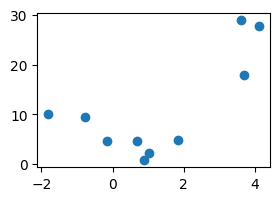

In [166]:
plt.figure(figsize=(3, 2))
plt.scatter(xtest,ytest)

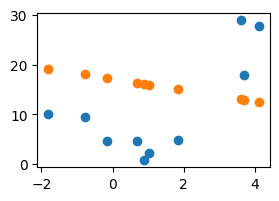

In [167]:
plt.figure(figsize=(3, 2))
plt.scatter(xtest,ytest)
plt.scatter(xtest,ypred)

# Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=5)

xpoly = poly.fit_transform(xtrain)


- after transform, we get 2 columns
- we create a transformer for polynomial features of given degree
- we transform xtrain 

In [169]:
xtest

,Temperature (°C)
13,-1.818938
45,3.704057
47,4.133534
44,3.610778
17,-0.773330
27,1.024181
26,0.874905
25,0.693599
31,1.850552
19,-0.149635


In [ ]:
model = LinearRegression()
model.fit(xpoly,ytrain)     #xpoly has 2 features
# model.score(xtest,ytest)
xtestpoly = poly.transform(xtest)
# model.predict(xtest)
xtestpoly

array([[ 1.00000000e+00, -1.81893761e+00,  3.30853403e+00,
        -6.01801697e+00,  1.09463974e+01, -1.99108139e+01],
       [ 1.00000000e+00,  3.70405744e+00,  1.37200415e+01,
         5.08198218e+01,  1.88239539e+02,  6.97250064e+02],
       [ 1.00000000e+00,  4.13353379e+00,  1.70861016e+01,
         7.06259782e+01,  2.91934867e+02,  1.20672264e+03],
       [ 1.00000000e+00,  3.61077848e+00,  1.30377212e+01,
         4.70763232e+01,  1.69982174e+02,  6.13767977e+02],
       [ 1.00000000e+00, -7.73330043e-01,  5.98039356e-01,
        -4.62481801e-01,  3.57651071e-01, -2.76582318e-01],
       [ 1.00000000e+00,  1.02418081e+00,  1.04894634e+00,
         1.07431072e+00,  1.10028842e+00,  1.12689429e+00],
       [ 1.00000000e+00,  8.74905029e-01,  7.65458810e-01,
         6.69703763e-01,  5.85927190e-01,  5.12630645e-01],
       [ 1.00000000e+00,  6.93598873e-01,  4.81079396e-01,
         3.33676127e-01,  2.31437385e-01,  1.60524709e-01],
       [ 1.00000000e+00,  1.85055193e+00,  3.424

- we are training 2 features but passing only one, so we get error
- fit_transform learns and transforms only features from xtrain ; if deg 1 tehn no extra feature is added, else for every other degree, the no. of added extra features increase
- fit trains the model 
- transform transforms the unseen data = xtest 

In [171]:
model.score(xtestpoly,ytest)

0.7781622233034887

In [172]:
xtestpoly
# xtestpoly[:,1]

array([[ 1.00000000e+00, -1.81893761e+00,  3.30853403e+00,
        -6.01801697e+00,  1.09463974e+01, -1.99108139e+01],
       [ 1.00000000e+00,  3.70405744e+00,  1.37200415e+01,
         5.08198218e+01,  1.88239539e+02,  6.97250064e+02],
       [ 1.00000000e+00,  4.13353379e+00,  1.70861016e+01,
         7.06259782e+01,  2.91934867e+02,  1.20672264e+03],
       [ 1.00000000e+00,  3.61077848e+00,  1.30377212e+01,
         4.70763232e+01,  1.69982174e+02,  6.13767977e+02],
       [ 1.00000000e+00, -7.73330043e-01,  5.98039356e-01,
        -4.62481801e-01,  3.57651071e-01, -2.76582318e-01],
       [ 1.00000000e+00,  1.02418081e+00,  1.04894634e+00,
         1.07431072e+00,  1.10028842e+00,  1.12689429e+00],
       [ 1.00000000e+00,  8.74905029e-01,  7.65458810e-01,
         6.69703763e-01,  5.85927190e-01,  5.12630645e-01],
       [ 1.00000000e+00,  6.93598873e-01,  4.81079396e-01,
         3.33676127e-01,  2.31437385e-01,  1.60524709e-01],
       [ 1.00000000e+00,  1.85055193e+00,  3.424

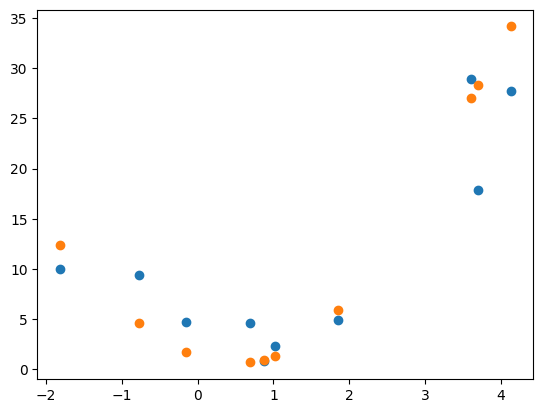

In [173]:
ypred = model.predict(xtestpoly)
plt.scatter(xtestpoly[:,1],ytest)
plt.scatter(xtestpoly[:,1],ypred)